In [4]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns

def get_dataset_reference():
    current_folder = Path(os.getcwd())
    model_folder = current_folder.parent.parent
    return Path(model_folder, "datasets")

In [5]:
filename = "4500.csv"
df = pd.read_csv(f"{get_dataset_reference()}\\{filename}")
df

,RegularTime,SpikeTime,MapName,FinalWinner,RoundID,MatchID,RoundNumber,RoundTime,ATK_loadoutValue,ATK_weaponValue,...,DEF_kills,DEF_Initiator,DEF_Duelist,DEF_Sentinel,DEF_Controller,Team_A_ID,Team_A_Name,Team_B_ID,Team_B_Name,Loadout_diff
0,100,0,Icebox,0,453773,29255,1,0,3850,1000,...,0,1,2,1,1,603,XSET,1021,TradeLikePros,300
1,0,45,Icebox,0,453773,29255,1,51279,3850,1000,...,0,1,2,1,1,603,XSET,1021,TradeLikePros,300
2,0,30,Icebox,0,453773,29255,1,65869,3050,500,...,1,1,2,1,1,603,XSET,1021,TradeLikePros,-500
3,0,30,Icebox,0,453773,29255,1,66759,3050,500,...,1,1,2,1,0,603,XSET,1021,TradeLikePros,100
4,0,27,Icebox,0,453773,29255,1,68924,2250,500,...,2,1,2,1,0,603,XSET,1021,TradeLikePros,-700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811549,0,45,Haven,0,331870,21167,24,41997,11100,8700,...,2,1,1,0,1,637,Rare Esports,567,OtherSide Esports,-3300
811550,0,34,Haven,0,331870,21167,24,52903,7300,5800,...,3,1,1,0,1,637,Rare Esports,567,OtherSide Esports,-7100
811551,0,33,Haven,0,331870,21167,24,53963,3500,2900,...,4,1,1,0,1,637,Rare Esports,567,OtherSide Esports,-10900
811552,0,29,Haven,0,331870,21167,24,58485,0,0,...,5,1,1,0,1,637,Rare Esports,567,OtherSide Esports,-14400


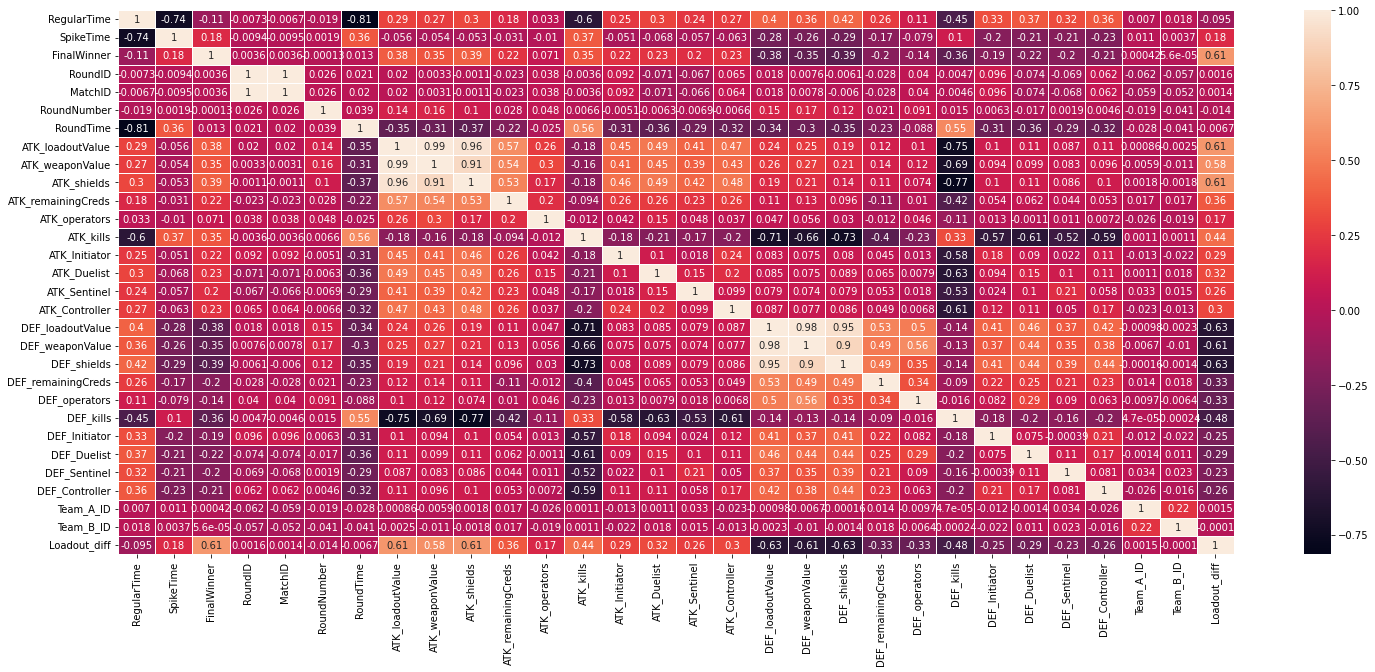

In [19]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corrMatrix, linewidths=.5, annot=True, ax=ax)
plt.show()

(array([  1059., 225282.,   6517.,  10288.,  16825.,  25621.,  22559.,
         20700.,  19284.,  62812.]),
 array([-7. , -1.8,  3.4,  8.6, 13.8, 19. , 24.2, 29.4, 34.6, 39.8, 45. ]),
 <BarContainer object of 10 artists>)

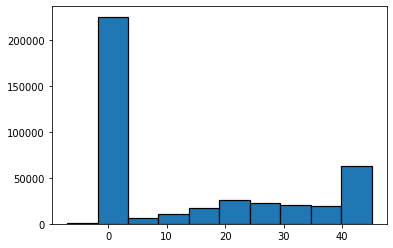

In [11]:
#spike_timings_winners = df[df.FinalWinner == 1]["SpikeTime"]
spike_timings_winners = df[df.FinalWinner == 1]["SpikeTime"]

plt.hist(spike_timings_winners, bins=10, edgecolor="black", linewidth=1.2)
#print(f'Fraction of those who did not receive a card and had no expenditures: {(expenditures_noncardholders == 0).mean()}')

# <font color='green'>Exploratory Analysis</font>

In [ ]:
df_grouped = df.groupby(["MatchID"]).max().groupby(["MapName"]).count()
df_grouped

#### <font color='yellow'>Attack vs defense skew</font>

<AxesSubplot:>

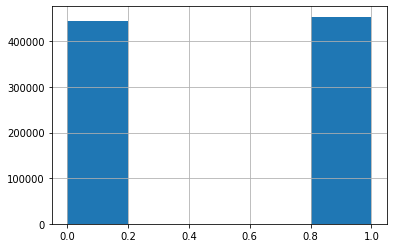

In [3]:
# Plot histogram of FinalWinner column
df.FinalWinner.hist(bins=5)

#### <font color='red'>Duelist importance on attacking side</font>

<AxesSubplot:xlabel='ATK_Duelist'>

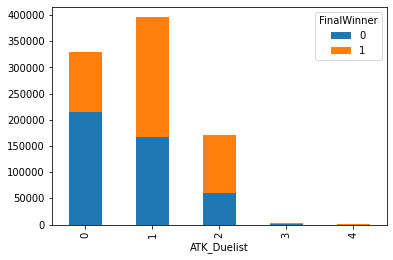

In [4]:
df.groupby(['ATK_Duelist', 'FinalWinner'])['ATK_Duelist'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='yellow'>Duelist importance on defensive side</font>

<AxesSubplot:xlabel='DEF_Duelist'>

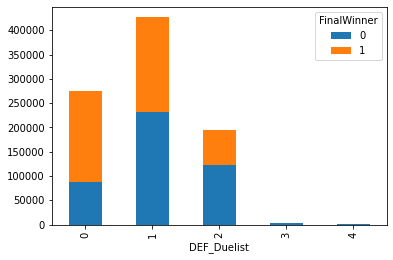

In [5]:
df.groupby(['DEF_Duelist', 'FinalWinner'])['DEF_Duelist'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='red'>Controller importance on attacking side</font>

<AxesSubplot:xlabel='ATK_Controller'>

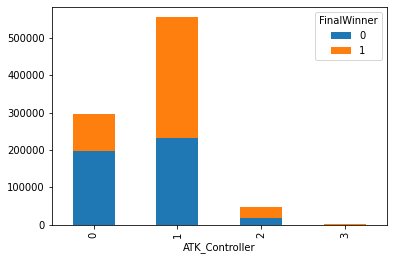

In [6]:
df.groupby(['ATK_Controller', 'FinalWinner'])['ATK_Controller'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='yellow'>Controller importance on defensive side</font>

<AxesSubplot:xlabel='DEF_Controller'>

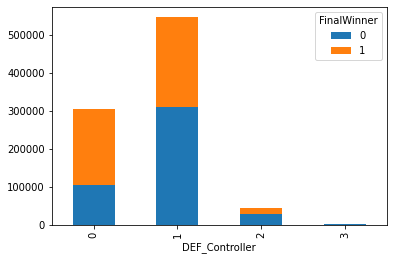

In [7]:
df.groupby(['DEF_Controller', 'FinalWinner'])['DEF_Controller'].count().unstack().plot(kind='bar', stacked=True)

#### <font color='red'>Time calculations</font>

In [8]:
time_df = df.copy()[["RegularTime", "SpikeTime", "FinalWinner"]]
time_df['RegularTimeHist'] = pd.cut(time_df['RegularTime'], 10)
time_df["SpikeTimeHist"] = pd.cut(time_df['SpikeTime'], 10)
regular_time_dict = {x: f"{int(x.left)} ~ {int(x.right)}" for x in time_df["RegularTimeHist"].unique()}
spike_time_dict = {x: f"{int(x.left)} ~ {int(x.right)}" for x in time_df["SpikeTimeHist"].unique()}

#### <font color='yellow'>Regular time win rate</font>

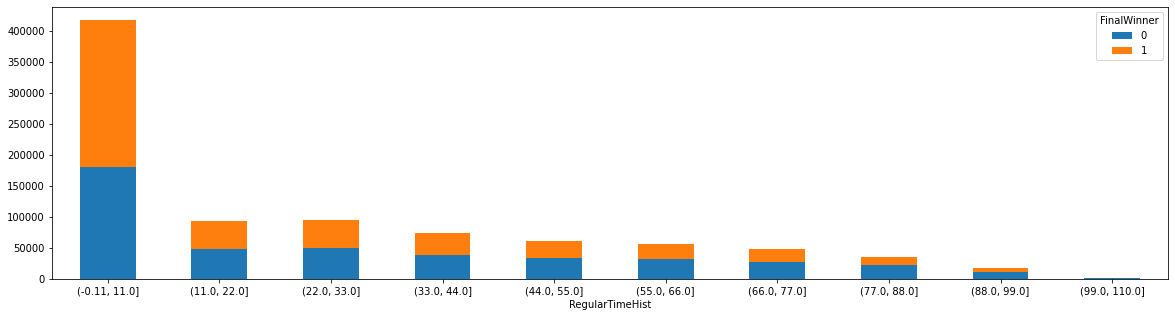

In [9]:
chosen_time = "RegularTimeHist"
regular_time_df = time_df.groupby([chosen_time, 'FinalWinner'])[chosen_time].count().unstack()
ax = regular_time_df.plot(kind='bar', stacked=True, figsize=(20,5), rot=360)

#### <font color='yellow'>Defense win rate as the regular time goes up</font>

<AxesSubplot:xlabel='Regular Time (s)'>

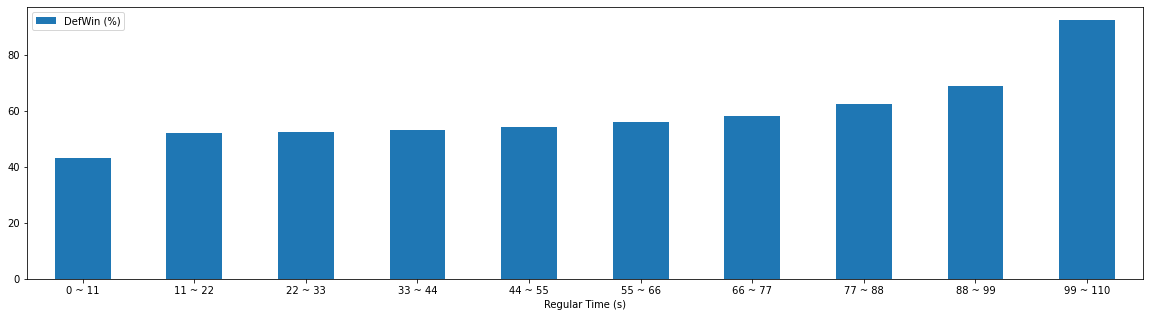

In [10]:
plain_regular_time_df = regular_time_df.reset_index()
plain_regular_time_df["DefWin (%)"] = (plain_regular_time_df[0] / (plain_regular_time_df[0] + plain_regular_time_df[1])) * 100
plain_regular_time_df["Regular Time (s)"] = [regular_time_dict[item] for item in list(regular_time_df.index)]
plain_regular_time_df.plot(x='Regular Time (s)', y='DefWin (%)', kind='bar', figsize=(20,5), rot=360)

#### <font color='yellow'>Spike time win rate</font>

<AxesSubplot:xlabel='SpikeTimeHist'>

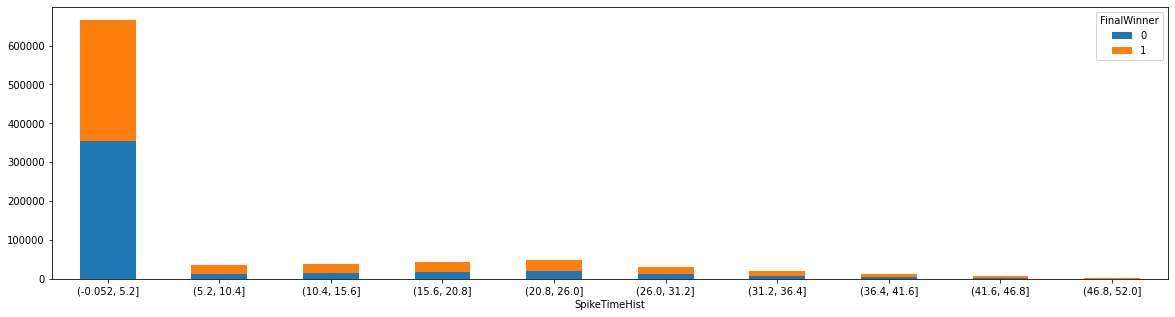

In [11]:
chosen_time = "SpikeTimeHist"
spike_time_df = time_df.groupby([chosen_time, 'FinalWinner'])[chosen_time].count().unstack()
spike_time_df.plot(kind='bar', stacked=True, figsize=(20,5), rot=360)

#### <font color='yellow'>Attackers win rate as spike time goes up</font>

<AxesSubplot:xlabel='Spike Time (s)'>

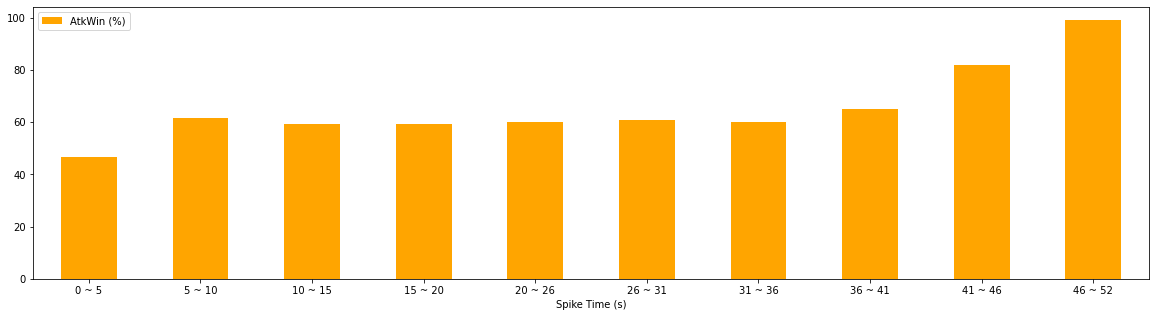

In [12]:
plain_spike_time_df = spike_time_df.reset_index()
plain_spike_time_df["AtkWin (%)"] = (plain_spike_time_df[1] / (plain_spike_time_df[0] + plain_spike_time_df[1])) * 100
plain_spike_time_df["Spike Time (s)"] = [spike_time_dict[item] for item in list(spike_time_df.index)]
plain_spike_time_df.plot(x='Spike Time (s)', y='AtkWin (%)', kind='bar', figsize=(20,5), rot=360, color="orange")

#### <font color='yellow'>Loadout diff</font>

<AxesSubplot:xlabel='Loadout diff hist'>

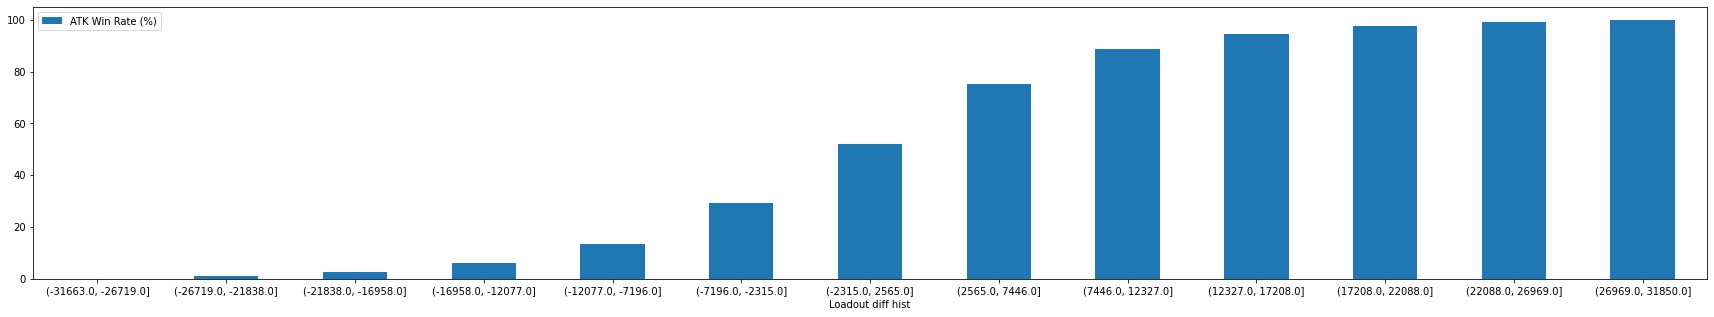

In [15]:
df["Loadout diff"] = df["ATK_loadoutValue"] - df["DEF_loadoutValue"]
df['Loadout diff hist'] = pd.cut(df['Loadout diff'], 13, precision=0)
chosen_var = "Loadout diff hist"
loadout_diff_hist = df.groupby([chosen_var, 'FinalWinner'])[chosen_var].count().unstack().reset_index()
loadout_diff_hist["ATK Win Rate (%)"] = (loadout_diff_hist[1] / (loadout_diff_hist[0] + loadout_diff_hist[1])) * 100

# Bar plot between Loadout diff hist and ATK Win Rate (%)
loadout_diff_hist.plot(x='Loadout diff hist', y='ATK Win Rate (%)', kind='bar', figsize=(30,5), rot=360)

#### <font color='yellow'>Round outcomes</font>

<AxesSubplot:>

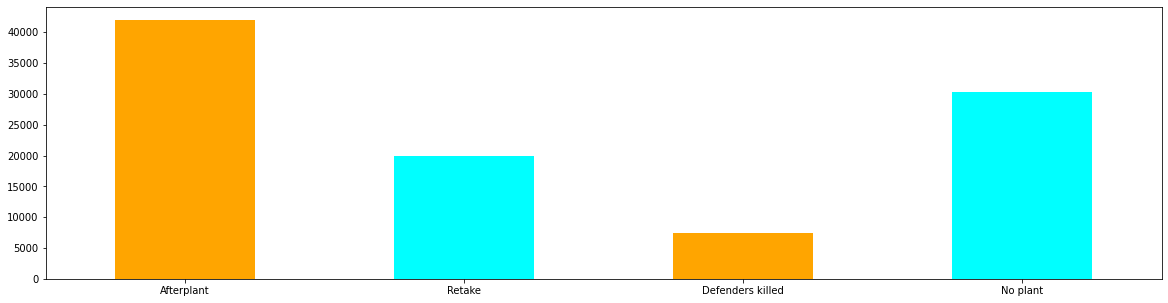

In [64]:
df["IsSpike"] = df["SpikeTime"] > 0
df["IsRegular"] = ~df["IsSpike"]
# Group by RoundID and groupby IsSpike and IsRegular
by_round = df.groupby(["RoundID"])[["IsSpike", "FinalWinner"]].max().reset_index()
# Plot by_round as a stacked bar chart using plt
total = by_round["IsSpike"].sum()
by_round["IsSpike"] = by_round["IsSpike"].astype(int)
# Create a boolean column "Afterplant" where "IsSpike" and "FinalWinner" are both 1
by_round["Afterplant"] = (by_round["IsSpike"] == 1) & (by_round["FinalWinner"] == 1)
by_round["Retake"] = (by_round["IsSpike"] == 1) & (by_round["FinalWinner"] == 0)
by_round["Defenders killed"] = (by_round["IsSpike"] == 0) & (by_round["FinalWinner"] == 1)
by_round["No plant"] = (by_round["IsSpike"] == 0) & (by_round["FinalWinner"] == 0)

# Plot bar char with Afterplant, Retake, Defenders killed and No plant
by_round_sum = by_round[["Afterplant", "Retake", "Defenders killed", "No plant"]].sum()
colors = ["Orange", "Cyan", "Orange", "Cyan"]

# Plot by_round_sum as a bar chart
by_round_sum.plot(kind='bar', stacked=True, figsize=(20,5), rot=360, color=colors)